In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
%matplotlib inline


In [165]:
df = pd.read_csv(
    "dataset/train.csv",
)

In [166]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [167]:
df.shape

(614, 13)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [169]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [170]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [171]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [172]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [173]:
duplicate_mask = df.duplicated()
print(duplicate_mask.value_counts())
df[duplicate_mask]

False    614
Name: count, dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [174]:
# from ydata_profiling import ProfileReport

# ProfileReport(df)

<Axes: >

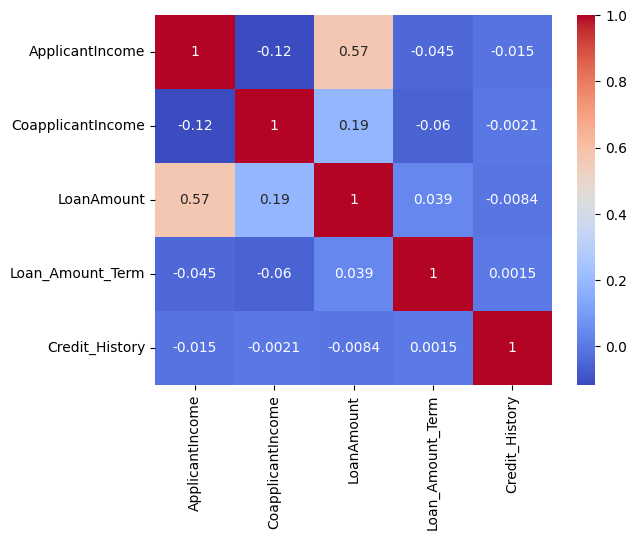

In [175]:
sns.heatmap(data=df.corr(numeric_only=True),cmap='coolwarm',annot=True)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

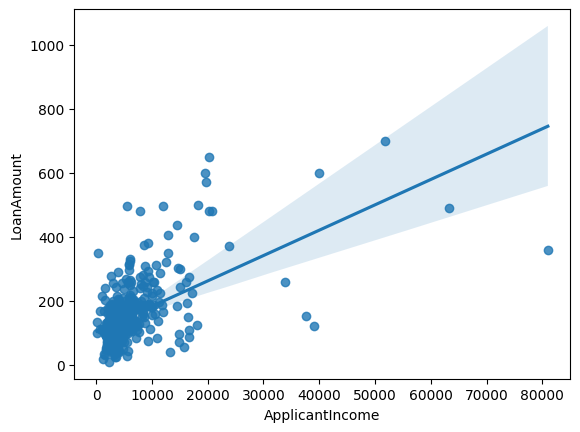

In [176]:
sns.regplot(data=df,x='ApplicantIncome',y='LoanAmount')

<Axes: xlabel='Gender', ylabel='count'>

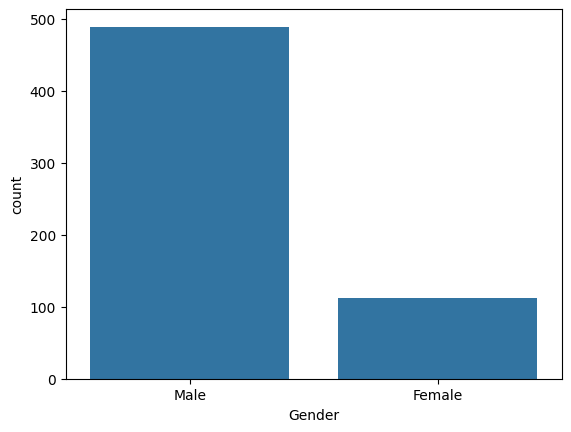

In [177]:
sns.countplot(data=df,x='Gender')

<Axes: xlabel='Education', ylabel='count'>

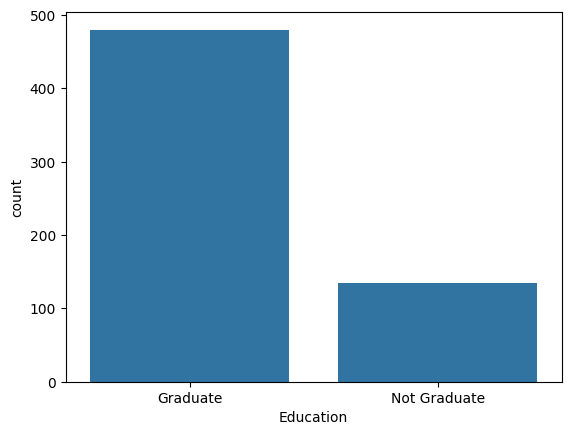

In [178]:
sns.countplot(data=df,x='Education')

<Axes: xlabel='Married', ylabel='count'>

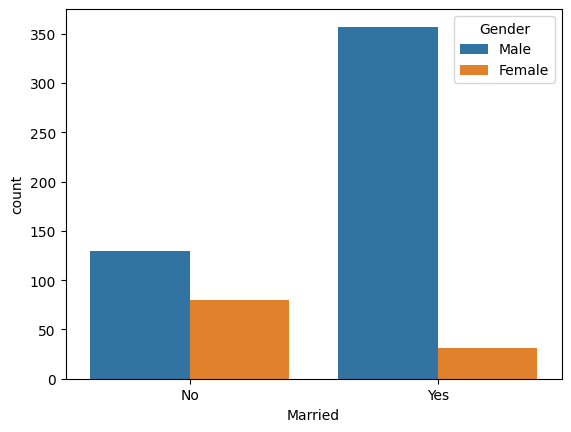

In [179]:
sns.countplot(data=df,x='Married',hue='Gender')

<Axes: xlabel='Loan_Status', ylabel='count'>

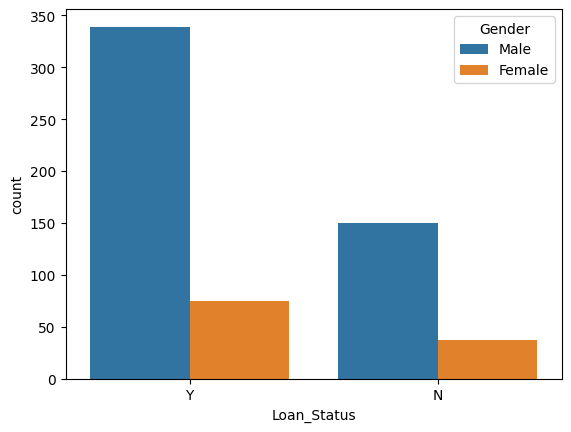

In [180]:
sns.countplot(data=df,x='Loan_Status',hue='Gender')

<Axes: xlabel='Loan_Status', ylabel='count'>

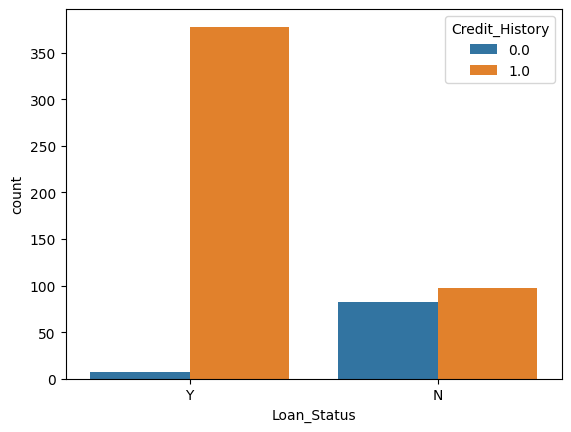

In [181]:
sns.countplot(data=df,x='Loan_Status',hue='Credit_History')

<Axes: xlabel='Loan_Status', ylabel='count'>

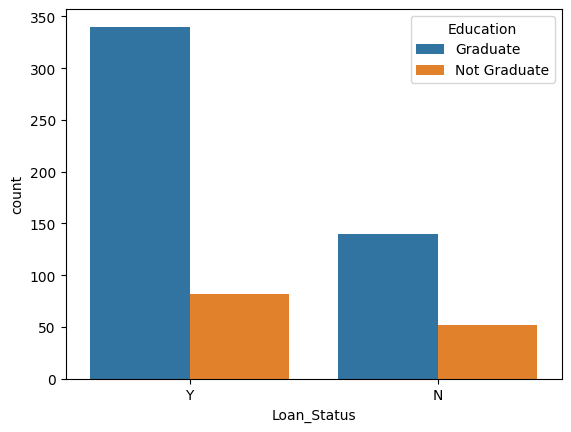

In [182]:
sns.countplot(data=df,x='Loan_Status',hue='Education')

<Axes: xlabel='Loan_Status', ylabel='count'>

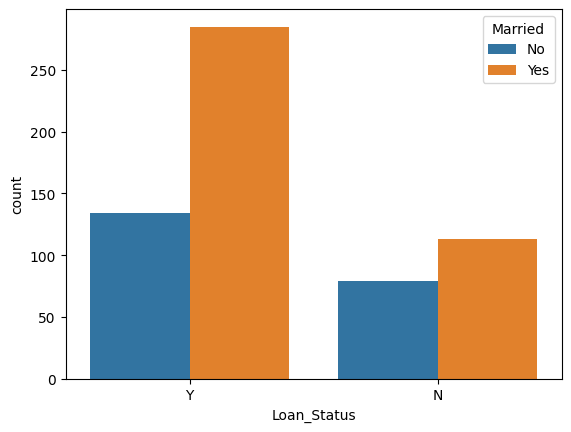

In [183]:
sns.countplot(data=df,x='Loan_Status',hue='Married')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: xlabel='Loan_Status', ylabel='count'>

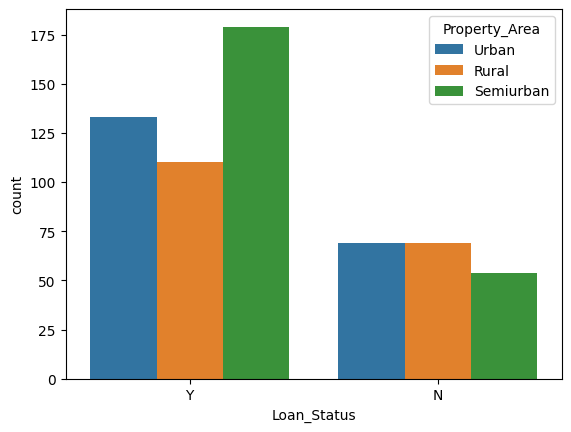

In [185]:
sns.countplot(data=df,x='Loan_Status',hue='Property_Area')

Text(0.5, 0, 'Property Area')

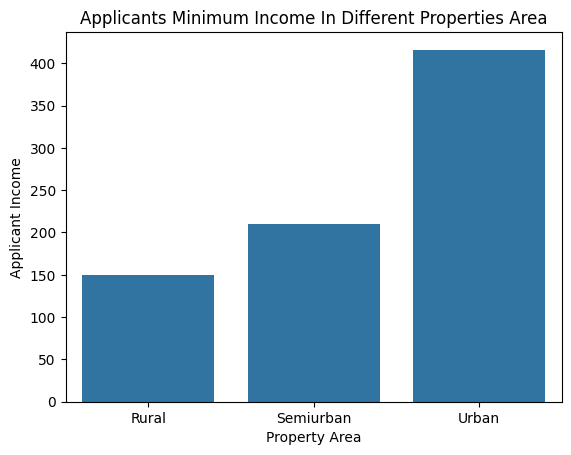

In [186]:
plt.title('Applicants Minimum Income In Different Properties Area')
sns.barplot(df.pivot_table(index='Property_Area',aggfunc={'ApplicantIncome':pd.Series.min}),x='Property_Area',y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.xlabel('Property Area')

In [187]:
df['Loan_Status'].value_counts().to_frame().T

Loan_Status,Y,N
count,422,192


As we can see our data is highly imbalance so we will apply resampling techniques and for that we will use undersampling

In [188]:
from sklearn import preprocessing
def encode_features(df_train, features, df_test=None):
    if df_test is not None:
        df_combined = pd.concat([df_train[features], df_test[features]])
    else:
        df_combined = df_train[features]
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        
        if df_test is not None:
            df_test[feature] = le.transform(df_test[feature])
    
    return df_train, df_test
    

In [189]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            mean_value = df[column].mean()
            df[column]=df[column].fillna(mean_value)
        else:
            mode_value = df[column].mode()[0]
            df[column]=df[column].fillna(mode_value)
    return df

In [190]:
y=df['Loan_Status']
X=df.drop(columns=['Loan_Status','Loan_ID'])

In [191]:
loan_not_given=df.loc[df['Loan_Status']=='N']
loan_given=df.loc[df['Loan_Status']=='Y'][:loan_not_given.shape[0]]
normal_distributed_df=pd.concat([loan_given,loan_not_given])
shuffled_undersampled_df= normal_distributed_df.sample(frac=1, random_state=42)
loan_given.shape[0]

192

In [192]:
y_undersampled=shuffled_undersampled_df['Loan_Status']
X_undersampled=shuffled_undersampled_df.drop(columns=['Loan_Status','Loan_ID'])

<Axes: xlabel='Loan_Status', ylabel='count'>

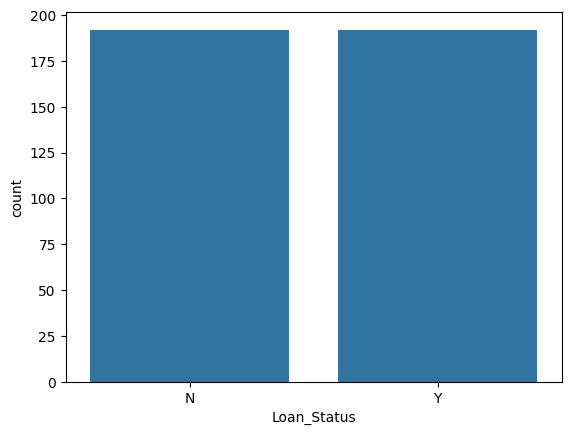

In [193]:
sns.countplot(data=shuffled_undersampled_df,x='Loan_Status')

In [194]:
X=fill_missing_values(X)
X_undersampled=fill_missing_values(X_undersampled)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
)

In [196]:
features_to_encode=['Gender','Married' ,'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area']

In [197]:
sm = SMOTE(random_state=42)
X_train_encoded,X_test_res=encode_features(X_train, df_test=X_test,features = features_to_encode)
X_train_res, y_train_res = sm.fit_resample(X_train_encoded, y_train)
y_test_res = y_test.copy(deep=True)

In [198]:
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = (
    train_test_split(
        X_undersampled,
        y_undersampled,
        test_size=0.2,
        shuffle=True,
    )
)

In [199]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [200]:
data_train,data_test=encode_features(X_train, df_test=X_test,features = features_to_encode)

In [201]:




dtree = make_pipeline(StandardScaler(), tree.DecisionTreeClassifier())
svc=make_pipeline(StandardScaler(),SVC())
logreg=make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
nbayes = make_pipeline(StandardScaler(), GaussianNB())
forest=make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=150))

dtree.fit(data_train, y_train)
svc.fit(data_train, y_train)
logreg.fit(data_train,y_train)
nbayes.fit(data_train, y_train)
forest.fit(data_train, y_train)


y_pred1=dtree.predict(data_test)
y_pred2=svc.predict(data_test)
y_pred3=logreg.predict(data_test)
y_pred4=nbayes.predict(data_test)
y_pred5=forest.predict(data_test)

print('Svm : ',accuracy_score(y_test, y_pred2))
print('D tree : ',accuracy_score(y_test, y_pred1))
print('Log Reg : ',accuracy_score(y_test, y_pred3))
print('Naive Bayes : ',accuracy_score(y_test, y_pred4))
print('Forest: ',accuracy_score(y_test, y_pred5))

Svm :  0.8048780487804879
D tree :  0.7154471544715447
Log Reg :  0.7886178861788617
Naive Bayes :  0.7560975609756098
Forest:  0.8048780487804879


In [202]:
y_test

274    Y
37     Y
373    N
516    Y
59     Y
      ..
383    Y
571    N
477    N
315    Y
417    N
Name: Loan_Status, Length: 123, dtype: object

In [203]:
X_dmatrix,_=encode_features(X,features=features_to_encode)
y_dmatrix=y.apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else x))
data_dmatrix = xgb.DMatrix(data=X_dmatrix,label=y_dmatrix)


In [204]:
data_dmatrix

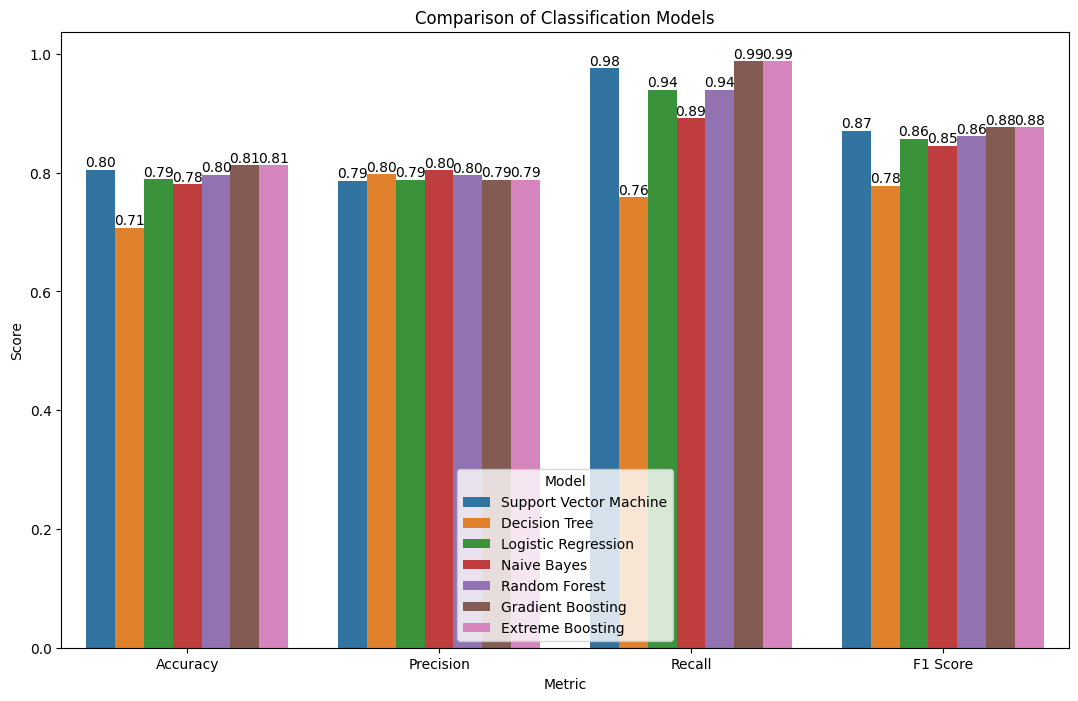

In [205]:
models = {
    'Support Vector Machine':make_pipeline(StandardScaler(),SVC()),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Logistic Regression':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=150),
    'Gradient Boosting':GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=6, random_state=0),
    'Extreme Boosting':XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.01, objective='binary:logistic')
}


metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
}

pos_label='Y'
for name, model in models.items():
    if name=='Extreme Boosting':
        y_train=y_train.apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else x))
        y_train=y_train
        y_test=y_test.apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else x))
        pos_label=1
    model.fit(data_train, y_train)
    y_pred = model.predict(data_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,pos_label=pos_label)
    recall = recall_score(y_test, y_pred,pos_label=pos_label)
    f1 = f1_score(y_test, y_pred,pos_label=pos_label)
    # metrics['Confusion Matrix'].append(confusion_matrix(y_test, y_pred))
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)


metrics_df = pd.DataFrame(metrics)

metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision','Recall','F1 Score'], var_name='Metric', value_name='Value')

plt.figure(figsize=(13, 8))
bars = sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model')
for container in bars.containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge')
plt.title('Comparison of Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.show()
# fig,axs=plt.subplots(ncols=5,figsize=(20,3))
# fig.suptitle('Confusion matrix comparison',size=17)
# for index,item in enumerate(metrics['Confusion Matrix']):
#     sns.heatmap(item,cmap='coolwarm',ax=axs[index],annot=True,fmt='d')
#     axs[index].set_xlabel('Prediction'+'\n\n'+metrics['Model'][index])
#     axs[index].set_ylabel('Actual')

In [206]:
data_train_undersampled,data_test_undersampled=encode_features(X_train_undersampled, df_test=X_test_undersampled,features = features_to_encode)

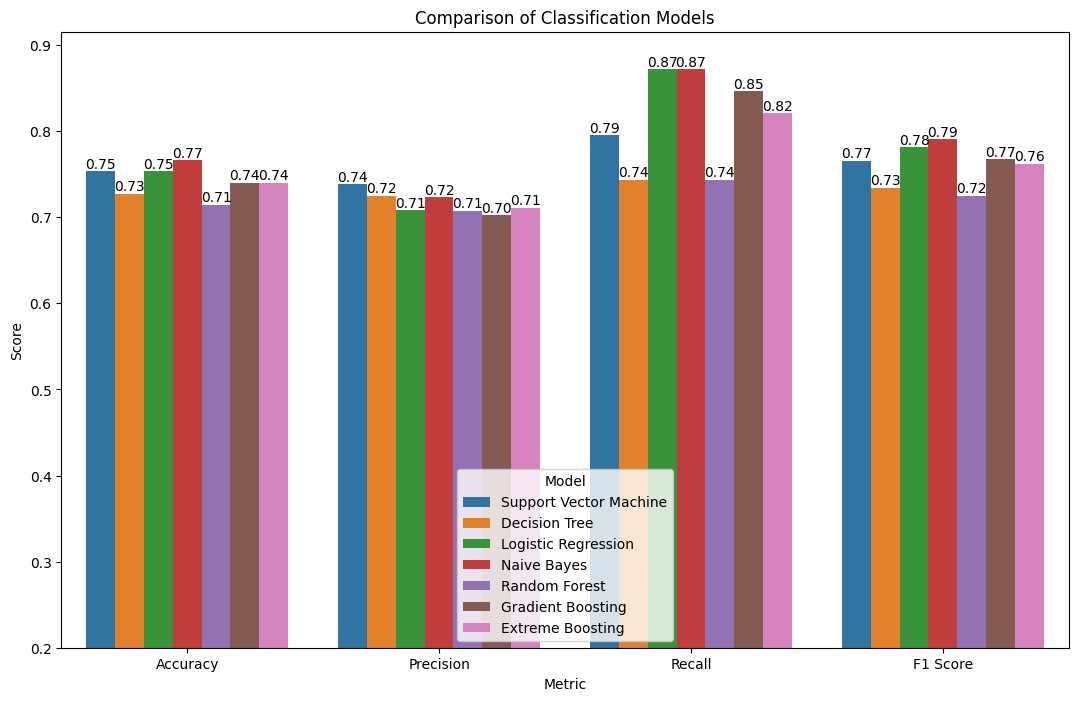

In [207]:
models_undersampled = {
    'Support Vector Machine':make_pipeline(StandardScaler(),SVC()),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Logistic Regression':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=150),
    'Gradient Boosting':GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=6, random_state=0),
    'Extreme Boosting':XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.01, objective='binary:logistic')
}


metrics_undersampled = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
}

pos_label='Y'
for name, model in models_undersampled.items():
    if name=='Extreme Boosting':
        y_train_undersampled=y_train_undersampled.apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else x))
        y_train_undersampled=y_train_undersampled
        y_test_undersampled=y_test_undersampled.apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else x))
        pos_label=1
    model.fit(data_train_undersampled, y_train_undersampled)
    y_pred = model.predict(data_test_undersampled)
    accuracy = accuracy_score(y_test_undersampled, y_pred)
    precision = precision_score(y_test_undersampled, y_pred,pos_label=pos_label)
    recall = recall_score(y_test_undersampled, y_pred,pos_label=pos_label)
    f1 = f1_score(y_test_undersampled, y_pred,pos_label=pos_label)
    # metrics['Confusion Matrix'].append(confusion_matrix(y_test_undersampled, y_pred))
    metrics_undersampled['Model'].append(name)
    metrics_undersampled['Accuracy'].append(accuracy)
    metrics_undersampled['Precision'].append(precision)
    metrics_undersampled['Recall'].append(recall)
    metrics_undersampled['F1 Score'].append(f1)


metrics_df_undersampled = pd.DataFrame(metrics_undersampled)

metrics_melted_undersampled = metrics_df_undersampled.melt(id_vars='Model', value_vars=['Accuracy', 'Precision','Recall','F1 Score'], var_name='Metric', value_name='Value')

plt.figure(figsize=(13, 8))
bars = sns.barplot(data=metrics_melted_undersampled, x='Metric', y='Value', hue='Model')
for container in bars.containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge')
plt.title('Comparison of Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(bottom=0.2)
plt.legend(title='Model',loc='lower center')
plt.show()
# fig,axs=plt.subplots(ncols=5,figsize=(20,3))
# fig.suptitle('Confusion matrix comparison',size=17)
# for index,item in enumerate(metrics['Confusion Matrix']):
#     sns.heatmap(item,cmap='coolwarm',ax=axs[index],annot=True,fmt='d')
#     axs[index].set_xlabel('Prediction'+'\n\n'+metrics['Model'][index])
#     axs[index].set_ylabel('Actual')

In [208]:
metrics_melted['Balanced']='N'
metrics_melted_undersampled['Balanced']='Y'

In [209]:
metrics_melted_undersampled

,Model,Metric,Value,Balanced
0,Support Vector Machine,Accuracy,0.753247,Y
1,Decision Tree,Accuracy,0.727273,Y
2,Logistic Regression,Accuracy,0.753247,Y
3,Naive Bayes,Accuracy,0.766234,Y
4,Random Forest,Accuracy,0.714286,Y
5,Gradient Boosting,Accuracy,0.740260,Y
6,Extreme Boosting,Accuracy,0.740260,Y
7,Support Vector Machine,Precision,0.738095,Y
8,Decision Tree,Precision,0.725000,Y
9,Logistic Regression,Precision,0.708333,Y


In [210]:
combined_metric_df=pd.concat([metrics_melted_undersampled,metrics_melted])

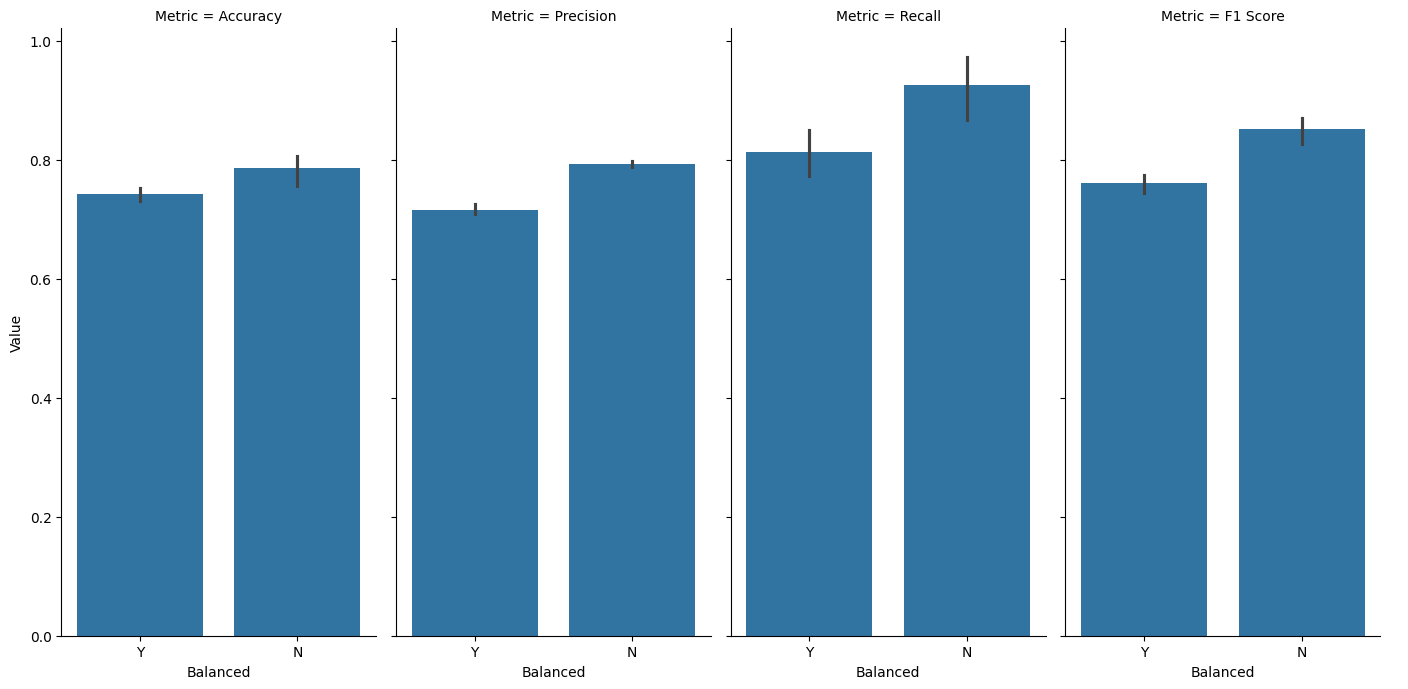

In [211]:
g = sns.FacetGrid(data=combined_metric_df, col='Metric', height=7, aspect=0.5)
g.map_dataframe(sns.barplot, x='Balanced', y='Value')
g.add_legend()
plt.show()

In [212]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,2,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,2,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,2,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,2,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,2,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,2,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,2,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,2,2


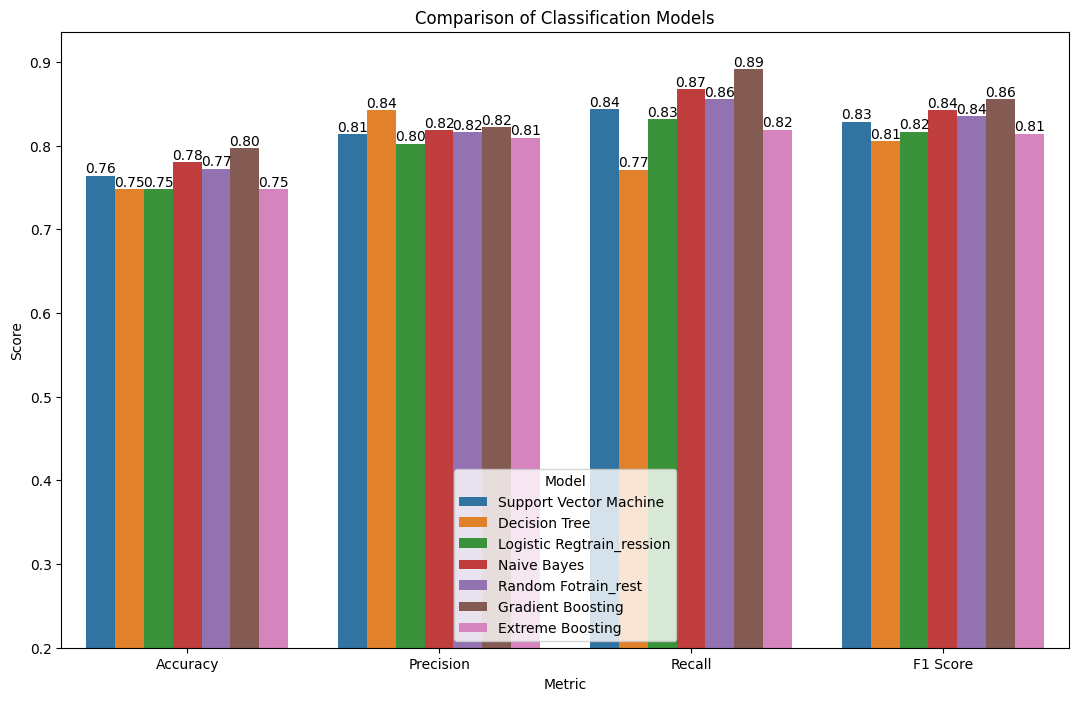

In [213]:

models_over = {
    'Support Vector Machine': make_pipeline(StandardScaler(), SVC()),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Logistic Regtrain_ression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'Naive Bayes': GaussianNB(),
    'Random Fotrain_rest': RandomForestClassifier(n_estimators=150),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=6, random_state=0),
    'Extreme Boosting': XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.01, objective='binary:logistic')
}

metrics_over = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
}

pos_label = 'Y'
for name, model in models_over.items():
    if name == 'Extreme Boosting':
        y_train_res = y_train_res.apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else x))
        y_train_res = y_train_res
        y_test_res = y_test_res.apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else x))
        pos_label = 1
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_res)
    accuracy = accuracy_score(y_test_res, y_pred)
    precision = precision_score(y_test_res, y_pred, pos_label=pos_label)
    recall = recall_score(y_test_res, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test_res, y_pred, pos_label=pos_label)
    metrics_over['Model'].append(name)
    metrics_over['Accuracy'].append(accuracy)
    metrics_over['Precision'].append(precision)
    metrics_over['Recall'].append(recall)
    metrics_over['F1 Score'].append(f1)

metrics_df_over = pd.DataFrame(metrics_over)

metrics_melted_over = metrics_df_over.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'], var_name='Metric', value_name='Value')

plt.figure(figsize=(13, 8))
bars = sns.barplot(data=metrics_melted_over, x='Metric', y='Value', hue='Model')
for container in bars.containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge')
plt.title('Comparison of Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(bottom=0.2)
plt.legend(title='Model', loc='lower center')
plt.show()


In [214]:
metrics_melted['Balanced']='N'
metrics_melted_undersampled['Balanced']='U'
metrics_melted_over['Balanced']='O'

In [215]:
full_combined_metric_df=pd.concat([metrics_melted_undersampled,metrics_melted,metrics_melted_over])

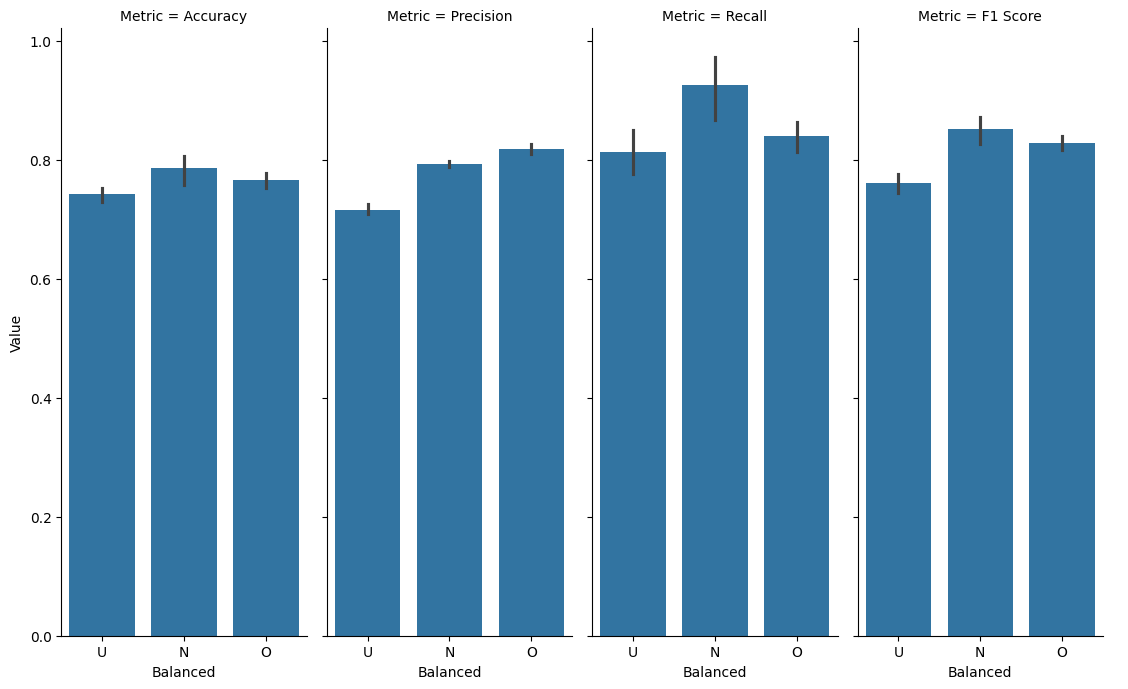

In [216]:
g = sns.FacetGrid(data=full_combined_metric_df, col='Metric', height=7,aspect=0.4)
g.map_dataframe(sns.barplot, x='Balanced', y='Value')
g.add_legend()
plt.show()